<a href="https://colab.research.google.com/github/ywateba/fds_2023_project/blob/main/fds_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import seaborn as sns

warnings.filterwarnings('ignore')


## 1.1 Import Data

In [10]:
# Directory containing all datasets
directory = './dataset_nba'

# List of CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Dictionary to memorize DataFrames
dataframes = {}

# Importa i file CSV e assegna loro nomi basati sul titolo del file
for file_name in csv_files:
    # Estrai il titolo del file (senza l'estensione .csv)
    title = os.path.splitext(file_name)[0]
    
    # Costruisci il percorso completo del file
    file_path = os.path.join(directory, file_name)
    
    # Leggi il file CSV in un DataFrame e assegna il titolo come chiave
    dataframes[title] = pd.read_csv(file_path)
    dataframes[title]['Season'] = str(title[:4])
    

# Ora puoi accedere ai tuoi DataFrame utilizzando i titoli assegnati ai file
# Ad esempio, per accedere al DataFrame del file 'file1.csv':
dataframes['2014-rookies']


,Rk,Player,Debut,Age,Yrs,G,MPTOT,FG,FGA,3P,...,PTSTOT,FG%,3P%,FT%,MP,PTS,TRB,AST,ID,Season
0,1,Steven Adams,Oct 30 '13 OKC @ UTA,20,10,706,18944,2713,4619,1,...,6518,0.587,0.067,0.536,26.8,9.2,8.2,1.5,adamsst01,2014
1,2,Giannis Antetokounmpo,Oct 30 '13 MIL @ NYK,19,11,742,24182,6171,11423,503,...,17017,0.540,0.286,0.707,32.6,22.9,9.6,4.7,antetgi01,2014
2,3,Pero Antić,Oct 30 '13 ATL @ DAL,31,2,113,1962,231,590,108,...,708,0.392,0.314,0.730,17.4,6.3,3.5,0.9,anticpe01,2014
3,4,Chris Babb,Mar 1 '14 BOS vs. IND,23,1,14,132,8,30,6,...,22,0.267,0.222,NaN,9.4,1.6,1.2,0.2,babbch01,2014
4,5,Anthony Bennett,Oct 30 '13 CLE vs. BRK,20,4,151,1905,251,641,36,...,658,0.392,0.261,0.670,12.6,4.4,3.1,0.5,bennean01,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,74,Casper Ware,Mar 24 '14 PHI @ SAS,24,1,9,116,18,42,7,...,48,0.429,0.333,0.833,12.9,5.3,1.0,1.1,wareca01,2014
74,75,Royce White,Mar 21 '14 SAC vs. SAS,22,1,3,9,0,1,0,...,0,0.000,NaN,NaN,3.0,0.0,0.0,0.0,whitero03,2014
75,76,Jeff Withey,Nov 1 '13 NOP @ ORL,23,5,206,2072,249,474,2,...,666,0.525,0.143,0.716,10.1,3.2,2.5,0.3,witheje01,2014
76,77,Nate Wolters,Oct 30 '13 MIL @ NYK,22,3,84,1575,191,452,18,...,461,0.423,0.261,0.635,18.8,5.5,2.2,2.5,woltena01,2014


In [11]:
rookies_id = dict()
for year in range(2014, 2024):
    rookies_id[year] = dataframes.get(f'{year}-rookies')['ID'].tolist()

rookies_id

{2014: ['adamsst01',
  'antetgi01',
  'anticpe01',
  'babbch01',
  'bennean01',
  'blueva01',
  'brownlo01',
  'bullore01',
  'burketr01',
  'buyckdw01',
  'calatni01',
  'caldwke01',
  'canaais01',
  'cartemi01',
  'chrisdi01',
  'clarkia01',
  'covinro01',
  'crabbal01',
  'curryse01',
  'danietr01',
  'datomlu01',
  'daviebr01',
  'dedmode01',
  'dellama01',
  'dienggo01',
  'edwarsh01',
  'favervi01',
  'felixca01',
  'frankja01',
  'goberru01',
  'goodwar01',
  'gutiejo01',
  'hamilju01',
  'hardati02',
  'harriel01',
  'hillso01',
  'hopsosc01',
  'hummero01',
  'karasse01',
  'kellyry01',
  'kuzmiog01',
  'larkish01',
  'ledori01',
  'lenal01',
  'mccalra01',
  'mccolcj01',
  'mclembe01',
  'mekelga01',
  'mitchto02',
  'mitchto03',
  'muhamsh01',
  'murpher01',
  'murryto01',
  'muscami01',
  'nedovne01',
  'nunnaja01',
  'oladivi01',
  'olynyke01',
  'onuakar01',
  'plumlma01',
  'porteot01',
  'pressph01',
  'radulmi01',
  'ricegl02',
  'roberan03',
  'schrode01',
  'sivape01

In [13]:
df_final = pd.DataFrame()

for year_rookie in range(2014, 2024):
    for year_player in range(year_rookie, 2024):
        df_att = dataframes.get(f'{year_player}-players')
        df_att = df_att[df_att['ID'].isin(rookies_id[year_rookie])]
        df_final = pd.concat([df_att, df_final], ignore_index=True)

df_final

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
0,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01,2023
1,20,Patrick Baldwin Jr.,SF,20,GSW,31,0,7.3,1.4,3.5,...,1.3,1.3,0.4,0.2,0.1,0.4,0.5,3.9,baldwpa01,2023
2,23,Paolo Banchero,PF,20,ORL,72,72,33.8,6.7,15.6,...,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,banchpa01,2023
3,26,Dominick Barlow,PF,19,SAS,28,0,14.6,1.6,3.1,...,2.0,3.6,0.9,0.4,0.7,0.5,2.0,3.9,barlodo01,2023
4,37,MarJon Beauchamp,SF,22,MIL,52,11,13.5,1.8,4.7,...,1.5,2.2,0.7,0.4,0.1,0.9,1.4,5.1,beaucma01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,455,Casper Ware,PG,24,PHI,9,0,12.9,2.0,4.7,...,1.0,1.0,1.1,0.9,0.0,0.6,1.2,5.3,wareca01,2014
3929,463,Royce White,PF,22,SAC,3,0,3.0,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,whitero03,2014
3930,472,Jeff Withey,C,23,NOP,58,4,11.8,1.2,2.2,...,1.7,2.6,0.4,0.3,0.9,0.3,1.3,3.3,witheje01,2014
3931,473,Nate Wolters,PG,22,MIL,58,31,22.6,2.9,6.7,...,2.0,2.6,3.2,0.6,0.3,1.0,1.2,7.2,woltena01,2014


Eliminiamo le righe relative ai giocatori che hanno cambiato squadra nell'arco della stagione, mantenendo solo la riga relativa alle statistiche delle 2 o più squadre in cui ha militato.

In [14]:
condition = (df_final['Tm'] != 'TOT') & df_final.duplicated(subset=['ID', 'Season'], keep=False)

# Applica le condizioni utilizzando il metodo loc
df = df_final.loc[~condition]
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
0,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01,2023
1,20,Patrick Baldwin Jr.,SF,20,GSW,31,0,7.3,1.4,3.5,...,1.3,1.3,0.4,0.2,0.1,0.4,0.5,3.9,baldwpa01,2023
2,23,Paolo Banchero,PF,20,ORL,72,72,33.8,6.7,15.6,...,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,banchpa01,2023
3,26,Dominick Barlow,PF,19,SAS,28,0,14.6,1.6,3.1,...,2.0,3.6,0.9,0.4,0.7,0.5,2.0,3.9,barlodo01,2023
4,37,MarJon Beauchamp,SF,22,MIL,52,11,13.5,1.8,4.7,...,1.5,2.2,0.7,0.4,0.1,0.9,1.4,5.1,beaucma01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,455,Casper Ware,PG,24,PHI,9,0,12.9,2.0,4.7,...,1.0,1.0,1.1,0.9,0.0,0.6,1.2,5.3,wareca01,2014
3929,463,Royce White,PF,22,SAC,3,0,3.0,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,whitero03,2014
3930,472,Jeff Withey,C,23,NOP,58,4,11.8,1.2,2.2,...,1.7,2.6,0.4,0.3,0.9,0.3,1.3,3.3,witheje01,2014
3931,473,Nate Wolters,PG,22,MIL,58,31,22.6,2.9,6.7,...,2.0,2.6,3.2,0.6,0.3,1.0,1.2,7.2,woltena01,2014


In [15]:
df_sorted = df.sort_values(by=['ID', 'Season'])
pd.set_option('display.max_rows', None)

df_sorted['Season'] = df_sorted['Season'] = df_sorted['Season'].astype(int)
df_sorted.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
2332,1,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,...,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,abrinal01,2017
2243,1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,abrinal01,2018
2165,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,abrinal01,2019
496,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01,2021
403,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01,2022
339,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01,2023
1343,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,adamsja01,2019
1172,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,adamsja01,2021
3323,2,Jordan Adams,SG,20,MEM,30,0,8.3,1.2,2.9,...,0.6,0.9,0.5,0.5,0.2,0.5,0.8,3.1,adamsjo01,2015
3244,2,Jordan Adams,SG,21,MEM,2,0,15.0,2.0,6.0,...,2.0,2.0,3.0,3.0,0.0,2.0,2.0,7.0,adamsjo01,2016


Only first 3 seasons.

In [16]:
pd.set_option('display.max_rows', None)
df = df_sorted.groupby('Player').head(3)
season_counts = df.groupby('Player')['Season'].count()
season_counts
selected_players = season_counts[season_counts >= 3].index
season_counts
selected_rows = df[df['Player'].isin(selected_players)]
df_final = selected_rows
df_final.head(30)
# Counter(df_final['Player'].tolist())

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
2332,1,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,...,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,abrinal01,2017
2243,1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,abrinal01,2018
2165,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,abrinal01,2019
496,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01,2021
403,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01,2022
339,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01,2023
3840,2,Steven Adams,C,20,OKC,81,20,14.8,1.1,2.3,...,2.3,4.1,0.5,0.5,0.7,0.9,2.5,3.3,adamsst01,2014
3756,3,Steven Adams,C,21,OKC,70,67,25.3,3.1,5.7,...,4.6,7.5,0.9,0.5,1.2,1.4,3.2,7.7,adamsst01,2015
3710,3,Steven Adams,C,22,OKC,80,80,2014.0,261.0,426.0,...,314.0,533.0,62.0,42.0,89.0,84.0,223.0,636.0,adamsst01,2016
1830,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,adebaba01,2018


Let's add the information about the year.

In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1431 entries, 2332 to 2240
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1431 non-null   int64  
 1   Player  1431 non-null   object 
 2   Pos     1431 non-null   object 
 3   Age     1431 non-null   int64  
 4   Tm      1431 non-null   object 
 5   G       1431 non-null   int64  
 6   GS      1431 non-null   int64  
 7   MP      1431 non-null   float64
 8   FG      1431 non-null   float64
 9   FGA     1431 non-null   float64
 10  FG%     1427 non-null   float64
 11  3P      1431 non-null   float64
 12  3PA     1431 non-null   float64
 13  3P%     1339 non-null   float64
 14  2P      1431 non-null   float64
 15  2PA     1431 non-null   float64
 16  2P%     1419 non-null   float64
 17  eFG%    1427 non-null   float64
 18  FT      1431 non-null   float64
 19  FTA     1431 non-null   float64
 20  FT%     1375 non-null   float64
 21  ORB     1431 non-null   float64
 22  DR

In [70]:
years = [i % 3 + 1 for i in range(df_final.shape[0])]
df_final['Year'] = years
df_final.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season,Year
496,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01,2021,1
403,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01,2022,2
339,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01,2023,3
1830,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,5.5,1.5,0.5,0.6,1.0,2.0,6.9,adebaba01,2018,1
1736,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,7.3,2.2,0.9,0.8,1.5,2.5,8.9,adebaba01,2019,2
1663,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01,2020,3
915,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01,2020,1
795,7,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10.0,...,3.1,2.2,1.0,0.5,1.5,1.9,11.0,alexani01,2021,2
683,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,2.9,2.4,0.7,0.4,1.4,1.6,10.6,alexani01,2022,3
1347,10,Grayson Allen,SG,23,UTA,38,2,10.9,1.8,4.7,...,0.6,0.7,0.2,0.2,0.9,1.2,5.6,allengr01,2019,1


Modifica ruoli

In [24]:
df_final['Pos'].replace('SG-SF', 'SG', inplace=True)
df_final['Pos'].replace('SF-SG', 'SF', inplace=True)
df_final['Pos'].replace('SG-PG', 'SG', inplace=True)
df_final['Pos'].replace('PF-SF', 'PF', inplace=True)
df_final['Pos'].replace('C-PF', 'C', inplace=True)
df_final['Pos'].replace('SF-PF', 'SF', inplace=True)
df_final['Pos'].replace('PF-C', 'PF', inplace=True)

Counter(df_final['Pos'].tolist())

Counter({'SG': 204, 'PF': 162, 'SF': 161, 'PG': 152, 'C': 113})

## 1.2 Analyze data

Let's start analyzing 

In [34]:
## DATASET SOLO DEL PRIMO ANNO/SECONDO/TERZO DI OGNI ROOKIE

first_year = df_final[df_final['Year'] == 1]
second_year = df_final[df_final['Year'] == 2]
third_year = df_final[df_final['Year'] == 3]
third_year.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season,Year
339,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01,2023,3
1663,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01,2020,3
683,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,2.9,2.4,0.7,0.4,1.4,1.6,10.6,alexani01,2022,3
1173,8,Grayson Allen,SG,25,MEM,50,38,25.2,3.5,8.3,...,3.2,2.2,0.9,0.2,1.0,1.4,10.6,allengr01,2021,3
1664,7,Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,...,9.6,1.6,0.6,1.3,1.1,2.3,11.1,allenja01,2020,3
1665,8,Kadeem Allen,PG,27,NYK,10,0,11.7,1.9,4.4,...,0.9,2.1,0.5,0.2,0.8,0.7,5.0,allenka01,2020,3
1174,13,Kostas Antetokounmpo,PF,23,LAL,15,0,3.7,0.2,0.7,...,1.3,0.1,0.1,0.3,0.7,0.5,0.8,antetko01,2021,3
340,13,Cole Anthony,PG,22,ORL,60,4,25.9,4.6,10.2,...,4.8,3.9,0.6,0.5,1.5,2.6,13.0,anthoco01,2023,3
1666,17,OG Anunoby,SF,22,TOR,69,68,29.9,4.1,8.2,...,5.3,1.6,1.4,0.7,1.1,2.4,10.6,anunoog01,2020,3
1667,18,Ryan Arcidiacono,PG,25,CHI,58,4,16.0,1.6,3.8,...,1.9,1.7,0.5,0.1,0.6,1.7,4.5,arcidry01,2020,3


Punti, rimbalzi e assist medi per ogni anno.

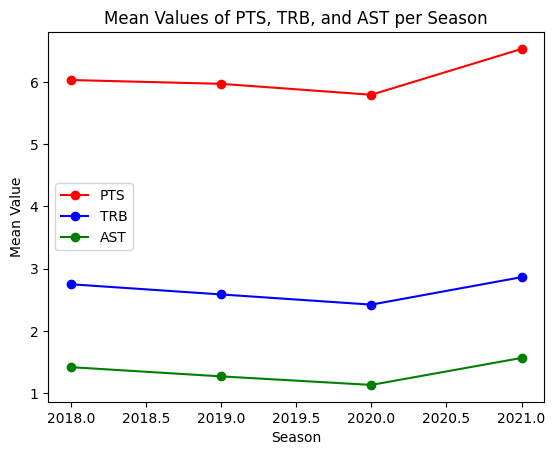

In [35]:
PTS_per_season = first_year.groupby('Season')['PTS'].mean()
TRB_per_season = first_year.groupby('Season')['TRB'].mean()
AST_per_season = first_year.groupby('Season')['AST'].mean()
fig, ax1 = plt.subplots()

# Plot the PTS data as a line with red color
ax1.plot(PTS_per_season.index, PTS_per_season.values, color='red', label='PTS', marker = 'o')

# Plot the TRB data as a line with blue color
ax1.plot(TRB_per_season.index, TRB_per_season.values, color='blue', label='TRB', marker = 'o')

# Plot the AST data as a line with green color
ax1.plot(AST_per_season.index, AST_per_season.values, color='green', label='AST', marker = 'o')

# Add a legend
ax1.legend(loc='center left')

# Set the x-axis label and y-axis label
ax1.set_xlabel('Season')
ax1.set_ylabel('Mean Value')

# Set the title of the graph
ax1.set_title('Mean Values of PTS, TRB, and AST per Season')
plt.show()

# pt assist rimbalzi

Analyze positions

In [36]:
Counter(first_year['Pos'].tolist())

Counter({'SG': 69, 'PF': 60, 'SF': 52, 'PG': 51, 'C': 32})

In [37]:
list_roles = first_year['Pos'].unique().tolist() # estraggo le differenti posizioni

PTS_per_season_pos = first_year.groupby(['Season', 'Pos'])['PTS'].mean()
TRB_per_season_pos = first_year.groupby(['Season', 'Pos'])['TRB'].mean()
AST_per_season_pos = first_year.groupby(['Season', 'Pos'])['AST'].mean()

PTS_per_season_pos

Season  Pos
2018    C      4.400000
        PF     6.381818
        PG     6.294118
        SF     6.200000
        SG     6.482353
2019    C      7.900000
        PF     5.472727
        PG     7.007692
        SF     4.966667
        SG     5.529412
2020    C      4.527273
        PF     5.852174
        PG     7.750000
        SF     6.083333
        SG     5.454167
2021    C      4.000000
        PF     4.746667
        PG     7.923077
        SF     7.340000
        SG     7.509091
Name: PTS, dtype: float64

## Correlation Matrix

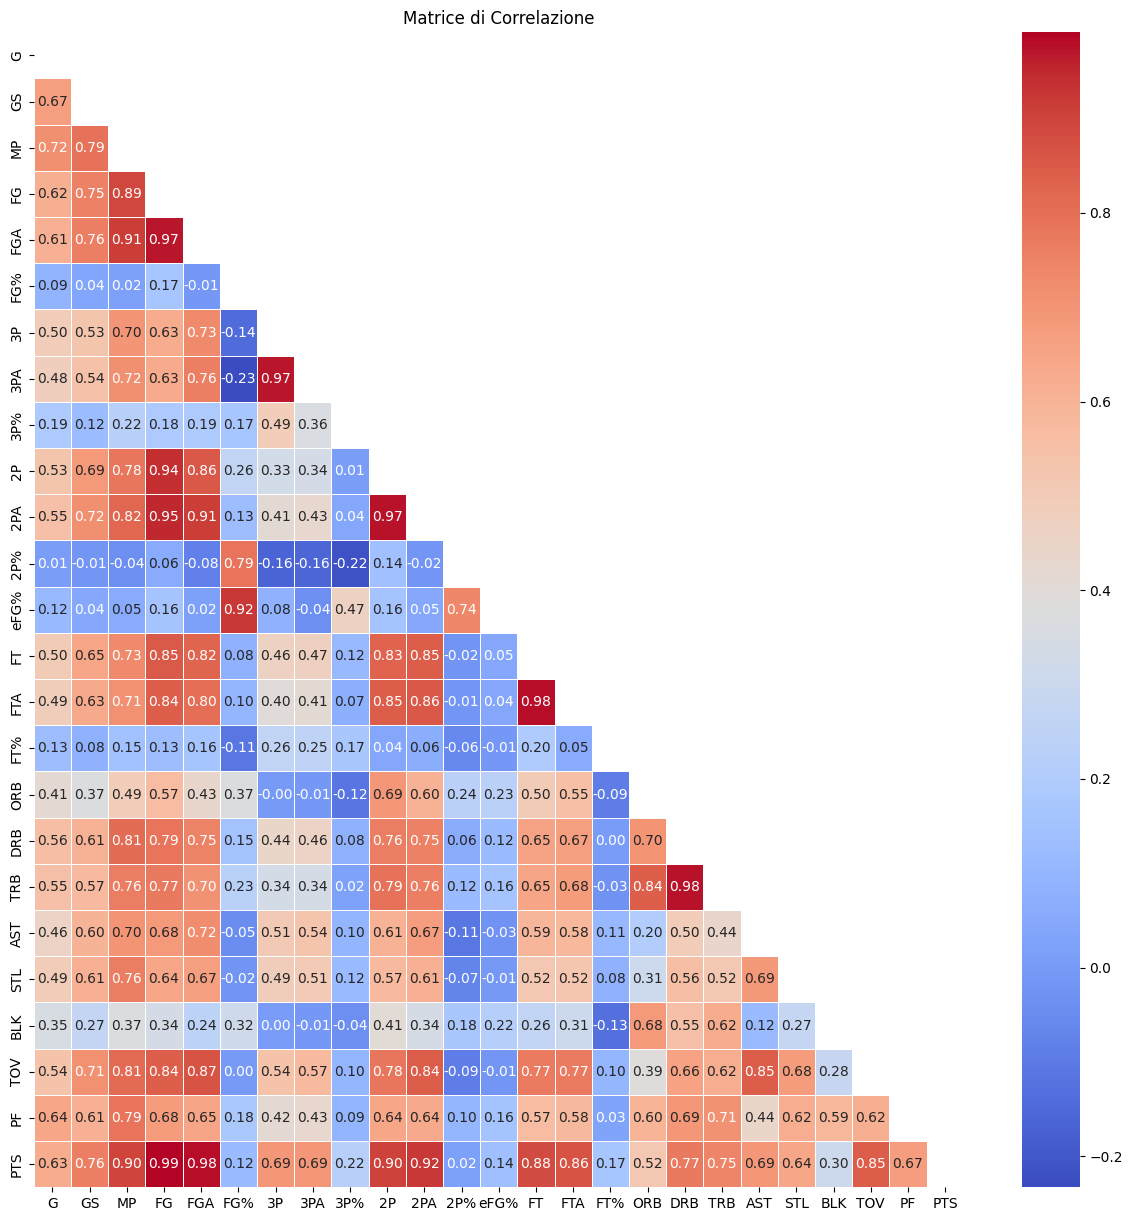

In [43]:
# CORRELATION MATRIX OF FIRST YEAR
columns_of_interest = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
                        'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

subset_df = first_year[columns_of_interest]

# Calcolo della matrice di correlazione
correlation_matrix = subset_df.corr()

# Creazione di una matrice con la stessa forma di quella di correlazione ma con valori NaN
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Creazione di un heatmap per visualizzare solo la metà superiore della matrice di correlazione
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("Matrice di Correlazione")
plt.show()


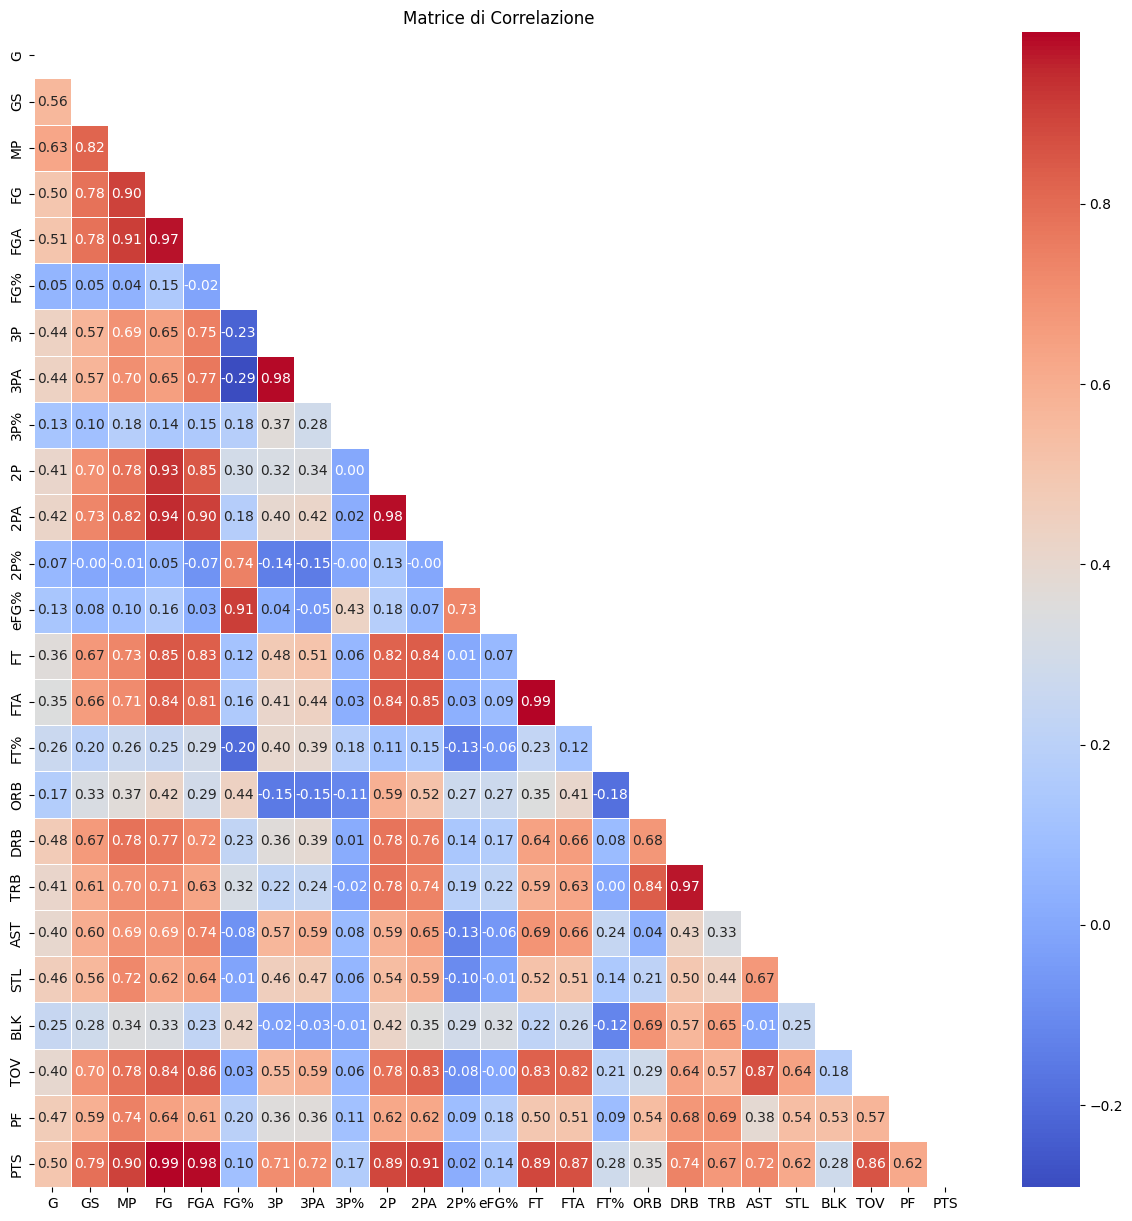

In [44]:
# CORRELATION MATRIX OF SECOND YEAR
columns_of_interest = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
                        'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

subset_df = second_year[columns_of_interest]

# Calcolo della matrice di correlazione
correlation_matrix_2 = subset_df.corr()

# Creazione di una matrice con la stessa forma di quella di correlazione ma con valori NaN
mask_2 = np.triu(np.ones_like(correlation_matrix_2, dtype=bool))

# Creazione di un heatmap per visualizzare solo la metà superiore della matrice di correlazione
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask_2)
plt.title("Matrice di Correlazione")
plt.show()


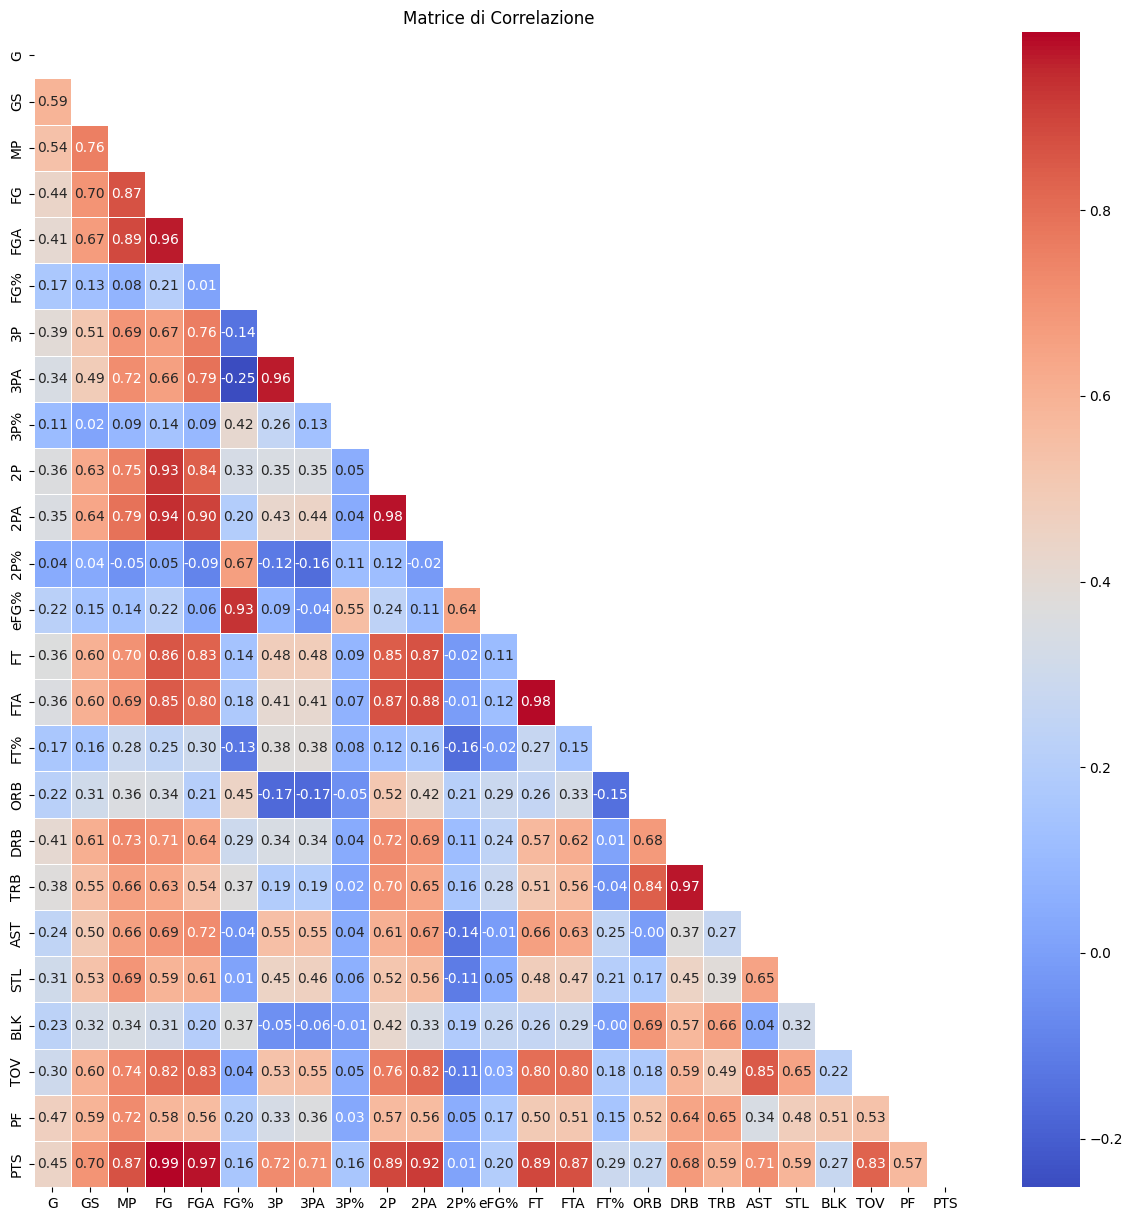

In [45]:
# CORRELATION MATRIX OF THIRD YEAR
columns_of_interest = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
                        'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

subset_df = third_year[columns_of_interest]

# Calcolo della matrice di correlazione
correlation_matrix_3 = subset_df.corr()

# Creazione di una matrice con la stessa forma di quella di correlazione ma con valori NaN
mask_3 = np.triu(np.ones_like(correlation_matrix_3, dtype=bool))

# Creazione di un heatmap per visualizzare solo la metà superiore della matrice di correlazione
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask_3)
plt.title("Matrice di Correlazione")
plt.show()


In [55]:
correlation_matrix_2
from scipy.stats import pearsonr
differenza = correlation_matrix_2 - correlation_matrix

# Calcolo della somma delle differenze quadrate
differenza_quad = np.sum(np.square(differenza))

# Calcolo della correlazione tra le matrici
correlazione, _ = pearsonr(np.array(correlation_matrix_2).flatten(), np.array(correlation_matrix).flatten())
correlazione

0.9830437030008662

In [88]:
## DATAFRAME PRESTAZIONI NEI TRE ANNI IN MEDIA PER OGNI PLAYER

df_media = df_final[columns_of_interest].groupby(np.arange(len(df_final[columns_of_interest])) // 3).mean().round(2)

list_ids = df_final[df_final['Year'] == 1]['ID'].tolist()
list_players = df_final[df_final['Year'] == 1]['Player'].tolist()
dict_player_id = {}
for id, player in zip(list_ids, list_players):
    dict_player_id[id] = player

dict_player_id.values
df_media['ID'] = dict_player_id.keys()
df_media['Player'] = dict_player_id.values()
df_media.head(30)

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Player
0,63.00,14.67,18.80,3.07,6.43,0.49,0.43,1.37,0.21,2.63,...,3.60,5.30,0.83,0.47,0.53,1.00,1.83,7.77,achiupr01,Precious Achiuwa
1,74.33,39.67,25.57,4.00,7.27,0.55,0.00,0.17,0.11,4.00,...,5.63,7.67,2.93,0.83,0.90,1.77,2.33,10.57,adebaba01,Bam Adebayo
2,52.67,11.67,19.03,3.40,8.73,0.39,1.43,4.27,0.33,1.97,...,2.23,2.60,2.17,0.70,0.37,1.33,1.57,9.10,alexani01,Nickeil Alexander-Walker
3,42.00,13.33,18.33,2.80,6.53,0.42,1.47,3.93,0.37,1.27,...,1.77,2.00,1.43,0.47,0.17,0.93,1.33,8.30,allengr01,Grayson Allen
4,74.00,58.33,24.23,3.93,6.40,0.61,0.07,0.30,0.16,3.87,...,5.30,7.80,1.23,0.50,1.33,1.17,2.20,10.07,allenja01,Jarrett Allen
5,15.67,0.67,13.17,1.87,4.33,0.39,0.47,1.37,0.26,1.40,...,1.13,1.40,2.27,0.50,0.17,0.90,1.30,5.33,allenka01,Kadeem Allen
6,7.33,0.00,4.40,0.27,0.93,0.43,0.00,0.00,NaN,0.27,...,0.57,0.80,0.17,0.37,0.10,0.47,0.30,1.07,antetko01,Kostas Antetokounmpo
7,57.33,34.33,28.23,4.93,11.97,0.41,1.50,4.37,0.35,3.43,...,4.27,4.97,4.57,0.63,0.40,2.13,2.43,14.07,anthoco01,Cole Anthony
8,70.00,45.33,23.37,3.00,6.30,0.48,1.10,3.00,0.36,1.93,...,2.70,3.57,1.00,0.93,0.40,0.83,2.10,7.83,anunoog01,OG Anunoby
9,54.33,12.00,17.63,1.53,3.57,0.42,0.77,2.13,0.35,0.73,...,1.67,1.87,2.17,0.60,0.03,0.63,1.53,4.40,arcidry01,Ryan Arcidiacono
